Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

Load the dataset

In [3]:
irisdata = datasets.load_iris()
irisdata

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Features of the dataset

In [4]:
features = irisdata.feature_names
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
X = irisdata.data
y = irisdata.target

In [6]:
X.shape

(150, 4)

Split the data into 10% test and 90% train

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Implement the class LinearRegression

In [8]:
class LinearRegression:
    def __init__(self, batch_count=32, regularization=0, max_epochs=100, patience=3):
        """
        Initialize Linear Regression model.

        Parameters:
        - batch_count (int): Number of samples in each mini-batch.
        - regularization (float): Regularization parameter (lambda).
        - max_epochs (int): Maximum number of epochs for training.
        - patience (int): Number of epochs to wait before early stopping if no improvement.
        """
        self.batch_count = batch_count
        self.regularization = regularization
        self.max_epochs = max_epochs
        self.patience = patience
        self.weight = None
        self.bias = 0

    def fit(self, X, observed_y):
        # Train the linear regression model using stochastic gradient descent (SGD).
        lr = 0.001  # Learning rate
        feature_count = X.shape[1]  # Number of features
        self.weight = np.ones(shape=(feature_count))  # Initialize weight vector
        self.bias = 0  # Initialize bias term

        record_count = X.shape[0]  # Number of records
        mean_squared_error_lt = []  # List to store mean squared error
        step_num_lt = []  # List to store step numbers

        lowest_mse = float('inf')  # Initialize lowest mean squared error
        delay = 0  # Initialize delay counter

        # Main training loop
        for i in range(self.max_epochs):
            # Shuffle data for stochasticity
            random_indices = np.random.choice(record_count, record_count, replace=False)
            X_shuffled = X[random_indices]
            y_shuffled = observed_y[random_indices]

            # Iterate over mini-batches
            for batch_start in range(0, record_count, self.batch_count):
                batch_end = min(batch_start + self.batch_count, record_count)
                X_batch = X_shuffled[batch_start:batch_end]
                y_batch = y_shuffled[batch_start:batch_end]

                # Compute predictions
                y_predicted = np.dot(X_batch, self.weight) + self.bias

                # Compute error
                error = y_predicted - y_batch

                # Compute gradients
                weight_gradient = (2 / len(X_batch)) * np.dot(X_batch.T, error)
                bias_gradient = (2 / len(X_batch)) * np.sum(error)

                # Update weights and bias
                self.weight -= lr * weight_gradient
                self.bias -= lr * bias_gradient

            # Compute mean squared error
            mse = np.mean((y_shuffled - np.dot(X_shuffled, self.weight) - self.bias) ** 2)
            mean_squared_error_lt.append(mse)
            step_num_lt.append(i)

            # Early stopping if no improvement
            if mse < lowest_mse:
                lowest_mse = mse
                delay = 0
            else:
                delay += 1
            
            if delay == self.patience:
                break

        return self.weight, self.bias, mse, mean_squared_error_lt, step_num_lt

    def fitL2(self, X, observed_y):
        # Fit the linear regression model with L2 regularization.
        return self.fit(X, observed_y)

    def predict(self, X, weight=None, bias=None):
        # Predict target values using trained model.
        if weight is None:
            weight = self.weight
        if bias is None:
            bias = self.bias
        return np.dot(X, weight) + bias

    def score(self, X, y):
        # Calculate mean squared error between predicted and true target values.
        mse = np.mean((y - self.predict(X)) ** 2)
        return mse

    def plot_loss(self, mean_squared_error_lt, step_num_lt):
        # Plot mean squared error vs. epoch.
        plt.plot(step_num_lt, mean_squared_error_lt)
        plt.title('Step Number vs Mean Squared Error')
        plt.xlabel('Step Number')
        plt.ylabel('Mean Squared Error')
        plt.show()


Train model 1 with X: sepal length & sepal width and Y: petal length

MSE: 1.6661987720802909


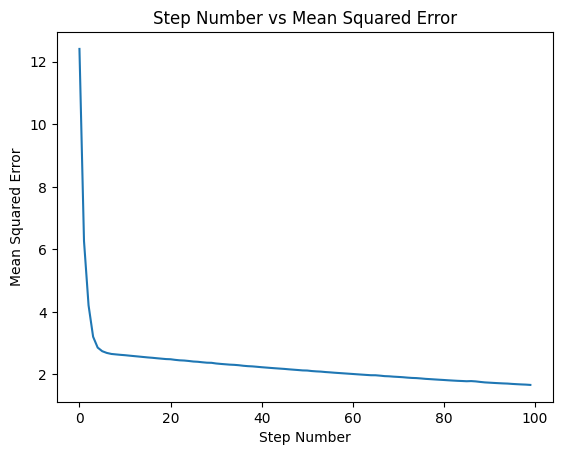

In [9]:
lrmodel1 = LinearRegression()
weight1, bias1, mse1, mean_squared_error_lt1, step_num_lt1 = lrmodel1.fit(X_train[:,0:2], X_train[:,2])
print(f"MSE: {mse1}")
lrmodel1.plot_loss(mean_squared_error_lt1, step_num_lt1)

Train model 2 with X: sepal width & petal length and Y: petal width

MSE: 0.05789093814303633


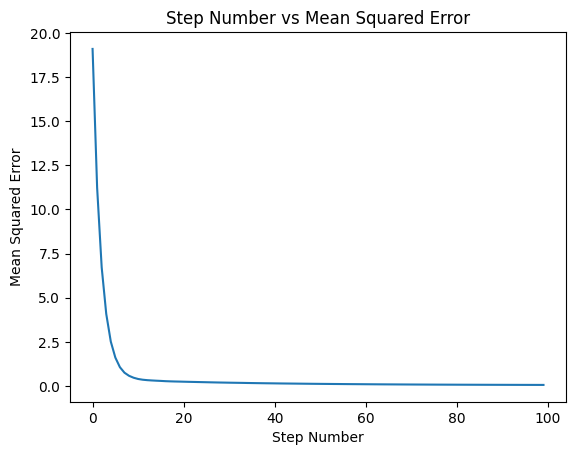

In [10]:
lrmodel2 = LinearRegression()
weight2, bias2, mse2, mean_squared_error_lt2, step_num_lt2 = lrmodel2.fit(X_train[:,1:3], X_train[:,3])
print(f"MSE: {mse2}")
lrmodel2.plot_loss(mean_squared_error_lt2, step_num_lt2)

Train model 3 with X: petal length & petal width and Y: sepal width

MSE: 1.7133974434704202


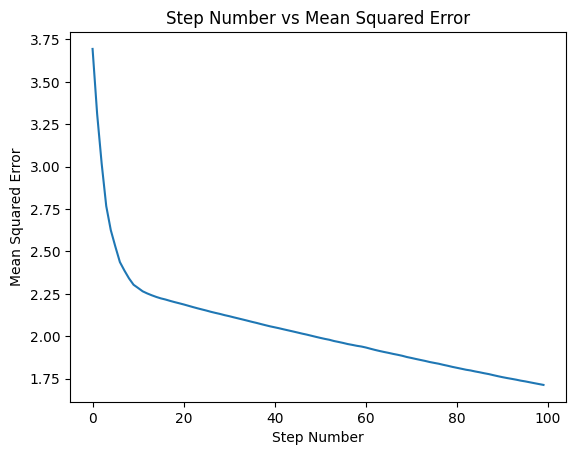

In [11]:
lrmodel3 = LinearRegression()
weight3, bias3, mse3, mean_squared_error_lt3, step_num_lt3 = lrmodel3.fit(X_train[:,2:3], X_train[:,1])
print(f"MSE: {mse3}")
lrmodel3.plot_loss(mean_squared_error_lt3, step_num_lt3)

Apply L2 Regularization to a linear regression model

MSE: 0.04113033032604178


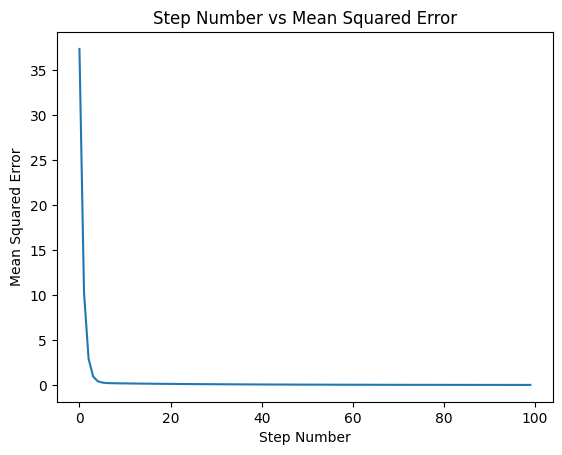

In [12]:
lrmodel = LinearRegression()
weight4, bias4, mse4, mean_squared_error_lt4, step_num_lt4 = lrmodel.fitL2(X_train[:,0:3], X_train[:,3]) 
print(f"MSE: {mse4}")
lrmodel.plot_loss(mean_squared_error_lt4, step_num_lt4)

Test the models

In [13]:
pred1 = lrmodel1.predict(X_test[:,0:2][5], weight1, bias1)
loss1 = lrmodel1.score(pred1, X_test[:,2][5])
print("MSE: ", loss1)

MSE:  1.6999017774753649


In [14]:
pred2 = lrmodel2.predict(X_test[:,1:3][1], weight2, bias2)
loss2 = lrmodel2.score(pred2, X_test[:,3][1])
print("MSE: ", loss2)

MSE:  0.2247879806576083


In [15]:
pred3 = lrmodel3.predict(X_test[:,2:3][2], weight3, bias3)
loss3 = lrmodel3.score(pred3, X_test[:,1][2])
print("MSE: ", loss3)

MSE:  0.04846623318052584


In [16]:
pred4 = lrmodel.predict(X_test[:,0:3][4], weight4, bias4)
loss4 = lrmodel.score(pred4, X_test[:,1][4])
print("MSE: ", loss4)

MSE:  7.786915587947824
